In [26]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing


## Import the data

In [27]:
# import the dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
# Only 3 values for the country field : we can use one hot encoding
data["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

## Encoding

In [29]:
def Encoding(data) :

  
    # encoding the str variables
    le = preprocessing.LabelEncoder()
    le.fit(data['country'])
    data['country'] = le.transform(data['country'])
    
    # data['marital']=data['marital'].astype('str')
    le.fit(data['gender'])
    data['gender'] = le.transform(data['gender'])

    return data

data = Encoding(data)


Text(0.5, 1.0, 'Correlation_matrix')

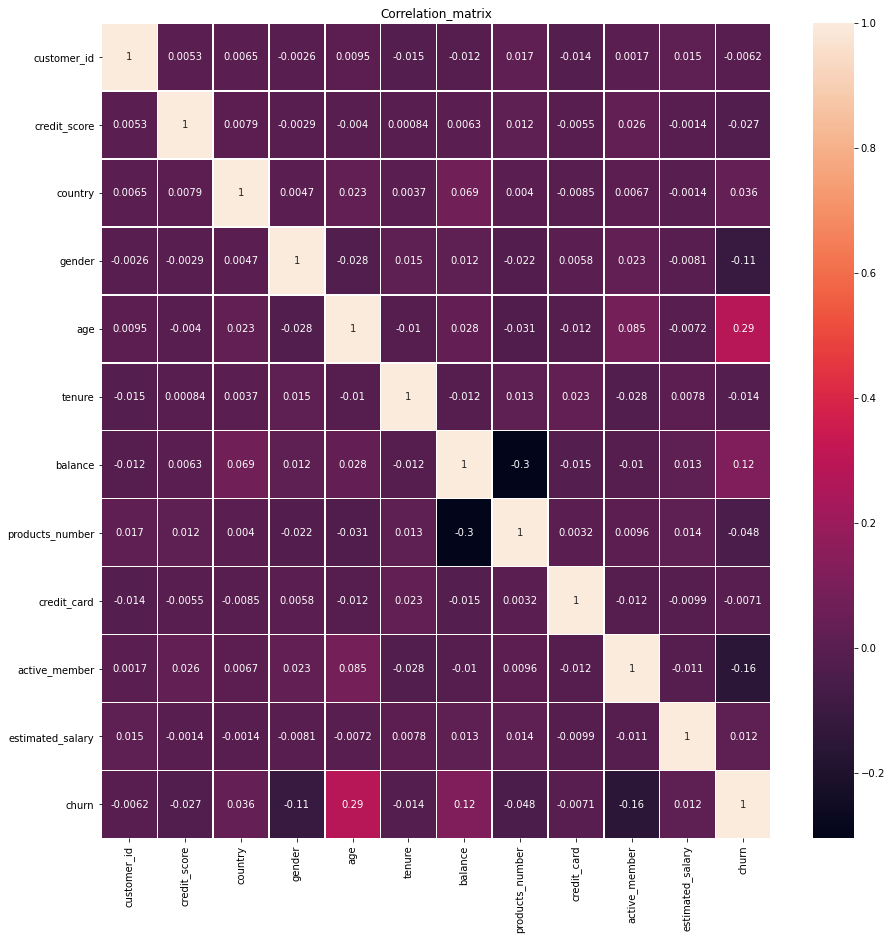

In [30]:
# compute the correlation matrix
cormat = data.corr()
round(cormat,2)
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(cormat, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation_matrix")

In [31]:
features = data.iloc[:,:-1].values
target = data.iloc[:,-1].values

In [32]:
# splitting the data btw train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [33]:
# Standardize features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Models

In [34]:
scores_modeles = pd.DataFrame(columns=['model_name', 'score'])

## Logistic Regression

In [36]:
# train the model (logistic regression) with PCA
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
parameter = [{'penalty':['l2','l1','elasticnet', 'none'],'C':[0.25,0.5,0.75,1],'intercept_scaling':[1,0.5,2]}]
grid_search_log=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_log.fit(X_train,y_train)
best_accuracy_log=grid_search_log.best_score_
best_params_log=grid_search_log.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_log*100))
print("Best Parameters:", best_params_log)

Best Accuracy: 80.99 %
Best Parameters: {'C': 0.25, 'intercept_scaling': 1, 'penalty': 'l2'}


In [37]:
# predict the results of the model
y_pred_log = grid_search_log.predict(X_test)

# Show confusion matrix
conf_matr_log = confusion_matrix(y_test, y_pred_log)
print(conf_matr_log)

[[1523   35]
 [ 382   60]]


In [38]:
# keeping the score
scoreDF = pd.DataFrame({'model_name': ['Logistic Regression'],'score': [best_accuracy_log]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [39]:
accuracy_score(y_test, y_pred_log)

0.7915

## Support Vector Machine

In [40]:
from sklearn.svm import SVC
parameter = [{'kernel':['rbf','linear'],'C':[0.1,0.5,0.9]}]
grid_search_svm=GridSearchCV(estimator=SVC(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search_svm.fit(X_train,y_train)
best_accuracy_svm=grid_search_svm.best_score_
best_params_svm=grid_search_svm.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_svm*100))
print("Best Parameters:", best_params_svm)

Best Accuracy: 85.71 %
Best Parameters: {'C': 0.9, 'kernel': 'rbf'}


In [41]:
scoreDF = pd.DataFrame({'model_name': ['SVC'],'score': [best_accuracy_svm]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [42]:
# predict the results of the model
y_pred_log = grid_search_log.predict(X_test)

# Show confusion matrix
conf_matr_log = confusion_matrix(y_test, y_pred_log)
print(conf_matr_log)

[[1523   35]
 [ 382   60]]


In [43]:
accuracy_score(y_test, y_pred_log)

0.7915

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

parameter = [{'splitter':["best", "random"],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_dt.fit(X_train,y_train)
best_accuracy_dt=grid_search_dt.best_score_
best_params_dt=grid_search_dt.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_dt*100))
print("Best Parameters:", best_params_dt)

Best Accuracy: 79.33 %
Best Parameters: {'criterion': 'entropy', 'splitter': 'best'}


In [47]:
scoreDF = pd.DataFrame({'model_name': ['Decision Tree'],'score': [best_accuracy_dt]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [48]:
# predict the results of the model
y_pred_dt = grid_search_dt.predict(X_test)

# Show confusion matrix
conf_matr_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_dt)

[[1360  198]
 [ 212  230]]


In [49]:
accuracy_score(y_test, y_pred_dt)

0.795

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
parameter = [{'n_estimators':[100,50,150,200],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_rf.fit(X_train,y_train)
best_accuracy_rf=grid_search_rf.best_score_
best_params_rf=grid_search_rf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_rf*100))
print("Best Parameters:", best_params_rf)

Best Accuracy: 86.03 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 150}


In [51]:
scoreDF = pd.DataFrame({'model_name': ['Random Forest'],'score': [best_accuracy_rf]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [52]:
# predict the results of the model
y_pred_rf = grid_search_rf.predict(X_test)

# Show confusion matrix
conf_matr_rf = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_rf)

[[1360  198]
 [ 212  230]]


In [53]:
accuracy_score(y_test, y_pred_rf)

0.859

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
parameters = [{"n_neighbors" : [3,5,10,15,20]
               }]
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_knn.fit(X_train, y_train)
best_accuracy_knn = grid_search_knn.best_score_
best_parameters_knn = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_knn*100))
print("Best Parameters:", best_parameters_knn)

Best Accuracy: 83.45 %
Best Parameters: {'n_neighbors': 10}


In [55]:
scoreDF = pd.DataFrame({'model_name': ['KNN'],'score': [best_accuracy_knn]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.809879
1,SVC,0.857125
2,Decision Tree,0.793258
3,Random Forest,0.860252
4,KNN,0.834500


In [56]:
# predict the results of the model
y_pred_knn = grid_search_knn.predict(X_test)

# Show confustion matrix

conf_matr_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matr_knn)

[[1538   20]
 [ 335  107]]


In [57]:
accuracy_score(y_test, y_pred_knn)

0.8225

## XGBoost

In [58]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.857

In [61]:
# predict the results of the model
y_pred_xgb = clf.predict(X_test)

In [62]:
# Show confustion matrix
conf_matr_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matr_xgb)

[[1513   45]
 [ 241  201]]


In [63]:
accuracy_score(y_test, y_pred_xgb)



0.857

## Find best model

In [65]:
best = scores_modeles[scores_modeles.score == max(scores_modeles.score)]['model_name'].values[0]
print(f'the best model is {best} with an accuracy of {round(max(scores_modeles.score),3)}')

the best model is Random Forest with an accuracy of 0.86


## Predictions

In [66]:
churn = grid_search_rf.predict(X_test)
churn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)